In [1]:

def d3_armor_reduction(df):
    df_c = df.copy()
    df_c['d3_res_reduction'] = (df_c['armor'] / (df_c['armor'] + df_c['lvl'] * 5)) * 100
    df_c['d3_res_dmg_taken'] = df_c['dpt100'] / 100 * (100 - df_c['d3_res_reduction'])
    return df_c


def lol_res_reduction(df):
    df_c = df.copy()
    lol_multi_cond = [df_c['armor'] < 0, df_c['armor'] >= 0]
    lol_neg_def = 2 - (100 / (100 - df_c['armor']))
    lol_pos_def = 100 / (100 + df_c['armor'])

    df_c['dmg_multi_lol'] = np.select(lol_multi_cond, [lol_neg_def, lol_pos_def])
    df_c['lol_dmg_taken'] = df_c['dmg_multi_lol'] * df_c['dpt100']
    return df_c


def avg_dmg_redu_dodge(df):
    df_c = df.copy()
    df_c['lol_dmg_redu_dodge'] = df_c['lol_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    df_c['d3_dmg_redu_dodge'] = df_c['d3_res_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    return df_c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from all_more_base_stats import *
f_results = fight_results[fight_results.columns[-(len(cl_df_list)*2):]]


('dex_class', {'starting_pts': 58, 'growth_pts': 11})
('str_class', {'starting_pts': 58, 'growth_pts': 11})
('int_class', {'starting_pts': 58, 'growth_pts': 12})


In [3]:
f_results.apply(lambda row: [(unit.name, round(unit.hp / unit.max_hp * 100, 2)) for unit in row])

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
0,"(str_cl, 16.64)","(str_cl, 0.05)","(int_cl, 0.7)","(dex_cl, 8.71)","(int_cl, 14.48)","(int_cl, 30.92)"
1,"(str_cl, 15.08)","(str_cl, 12.21)","(int_cl, 6.3)","(str_cl, 2.67)","(int_cl, 18.35)","(int_cl, 27.03)"
2,"(str_cl, 17.18)","(str_cl, 9.73)","(int_cl, 7.73)","(str_cl, 1.07)","(str_cl, 3.11)","(int_cl, 0.06)"
3,"(str_cl, 17.78)","(str_cl, 5.28)","(dex_cl, 9.9)","(dex_cl, 4.09)","(int_cl, 10.54)","(int_cl, 10.31)"
4,"(str_cl, 19.07)","(str_cl, 12.49)","(dex_cl, 20.48)","(str_cl, 8.34)","(str_cl, 8.3)","(int_cl, 5.18)"
5,"(str_cl, 18.73)","(str_cl, 15.11)","(dex_cl, 6.71)","(dex_cl, 13.7)","(str_cl, 5.11)","(int_cl, 25.71)"
6,"(str_cl, 11.52)","(str_cl, 18.55)","(dex_cl, 6.14)","(str_cl, 4.89)","(int_cl, 0.16)","(int_cl, 8.79)"
7,"(str_cl, 12.64)","(str_cl, 5.12)","(dex_cl, 6.38)","(str_cl, 9.84)","(str_cl, 0.58)","(dex_cl, 20.92)"
8,"(str_cl, 7.67)","(str_cl, 19.11)","(dex_cl, 8.26)","(str_cl, 3.39)","(str_cl, 1.68)","(int_cl, 11.87)"
9,"(str_cl, 4.84)","(str_cl, 29.43)","(dex_cl, 10.0)","(str_cl, 18.46)","(str_cl, 18.57)","(dex_cl, 21.34)"


In [4]:
get_unit_attribute(f_results, 'name').describe()

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
count,30,30,30,30,30,30
unique,2,2,2,2,2,2
top,dex_cl,str_cl,dex_cl,dex_cl,str_cl,dex_cl
freq,16,23,21,17,18,18


In [5]:
# approx turns it took to win
turns_to_win = (get_unit_attribute(f_results, 'ct_to_win') / 100)[1:]  # clock ticks it took to win / 100 ticks (for a turn)
turns_to_win

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
1,192.60,131.61,101.65,39.59,25.68,17.12
2,138.03,93.09,68.90,38.52,29.96,22.26
3,110.24,76.32,53.04,41.82,24.15,19.95
4,93.28,61.48,45.45,38.16,25.44,16.64
5,79.50,53.00,41.00,33.00,25.44,16.48
6,74.55,51.45,34.65,42.00,23.69,19.57
7,68.25,45.15,34.30,35.70,25.20,18.62
8,65.52,38.48,29.10,39.52,22.88,20.20
9,70.72,31.20,29.76,37.44,19.76,13.44
10,59.74,37.08,25.74,41.20,21.63,16.83


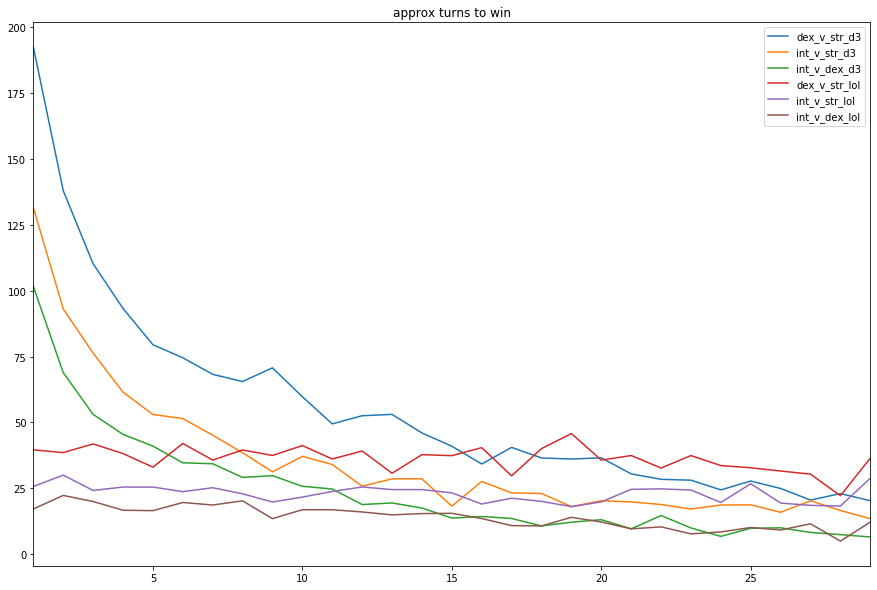

In [6]:

turns_to_win.plot(title='approx turns to win' ,figsize=[15,10])

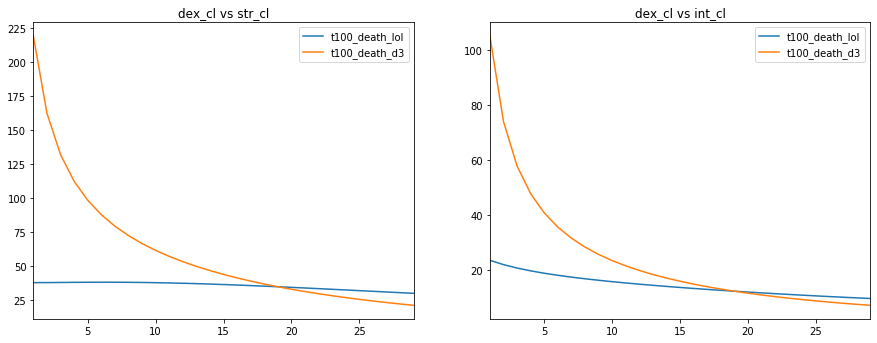

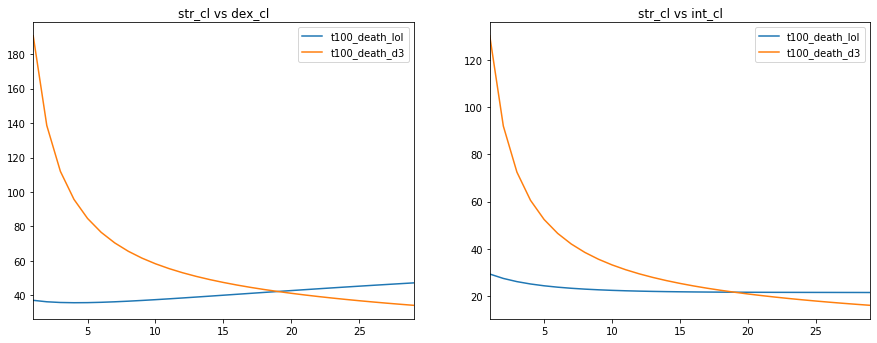

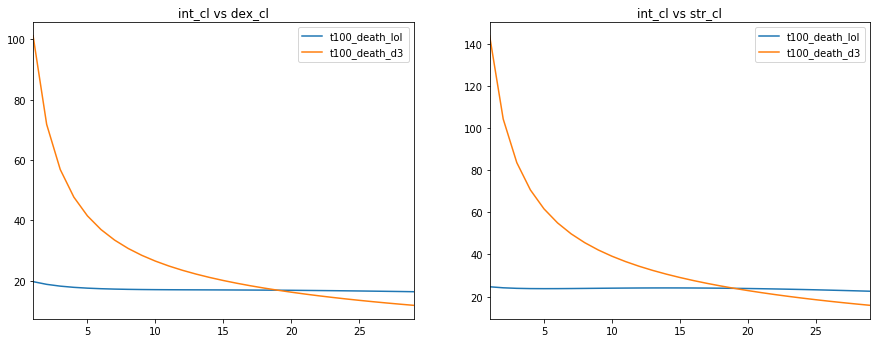

In [7]:
# how many 100clock ticks does it take to kill the defender
for i,attacker in enumerate(cl_df_list):
    cl_df_l_copy = cl_df_list.copy()
    cl_df_l_copy.pop(i)
    
    fig = plt.figure(figsize=[15, 12])
    for n, defender in enumerate(cl_df_l_copy):
        ax = fig.add_subplot(221+n)
        test_df = pd.concat([attacker[['dpt100', 'lvl']], defender[['dodge', 'd3_res_reduction', 'dmg_multi_lol', 'hp', 'armor']]], axis=1)
        
        test_df = d3_armor_reduction(test_df)
        test_df = lol_res_reduction(test_df)
        test_df = avg_dmg_redu_dodge(test_df)
        test_df['t100_death_lol'] = test_df['hp'] / test_df['lol_dmg_redu_dodge']
        test_df['t100_death_d3'] = test_df['hp'] / test_df['d3_dmg_redu_dodge']
        test_df[['t100_death_lol', 't100_death_d3']].iloc[1:].plot(title=attacker.name+' vs '+defender.name, ax=ax)

In [8]:
compare(all_cl_df, ['speed', 'ticks_to_turn'])

,speed_dex,speed_str,speed_int,ticks_to_turn_dex,ticks_to_turn_str,ticks_to_turn_int
0,9.52,9.32,9.32,105.04,107.30,107.30
1,9.62,9.36,9.40,103.95,106.84,106.38
2,9.72,9.40,9.48,102.88,106.38,105.49
3,9.82,9.44,9.56,101.83,105.93,104.60
4,9.92,9.48,9.64,100.81,105.49,103.73
5,10.02,9.52,9.72,99.80,105.04,102.88
6,10.12,9.56,9.80,98.81,104.60,102.04
7,10.22,9.60,9.88,97.85,104.17,101.21
8,10.32,9.64,9.96,96.90,103.73,100.40
9,10.42,9.68,10.04,95.97,103.31,99.60


In [9]:
compare(all_cl_df, ['dodge', 'crit_dmg', 'crit_chan'])

,dodge_dex,dodge_str,dodge_int,crit_dmg_dex,crit_dmg_str,crit_dmg_int,crit_chan_dex,crit_chan_str,crit_chan_int
0,9.456,7.396,7.396,180,150,150,9.75,7.25,7.25
1,10.086,7.608,7.820,190,154,157,10.75,7.75,8.00
2,10.716,7.820,8.244,200,158,164,11.75,8.25,8.75
3,11.346,8.032,8.668,210,162,171,12.75,8.75,9.50
4,11.976,8.244,9.092,220,166,178,13.75,9.25,10.25
5,12.606,8.456,9.516,230,170,185,14.75,9.75,11.00
6,13.236,8.668,9.940,240,174,192,15.75,10.25,11.75
7,13.866,8.880,10.364,250,178,199,16.75,10.75,12.50
8,14.496,9.092,10.788,260,182,206,17.75,11.25,13.25
9,15.126,9.304,11.212,270,186,213,18.75,11.75,14.00


In [10]:
compare(all_cl_df, ['m_dmg_wo_wpn', 'd_dmg_wo_wpn', 'p_dmg_wo_wpn','b_dmg' ,'dpt100'])

,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int,d_dmg_wo_wpn_dex,d_dmg_wo_wpn_str,d_dmg_wo_wpn_int,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,b_dmg_dex,b_dmg_str,b_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,4.2,4.2,20.4,15.0,7.0,7.0,7.6,11.1,3.4,98.5,84.26,154.07,101.09,81.37,148.79
1,5.7,5.7,25.5,18.0,8.4,9.2,8.9,13.8,4.7,115.0,100.59,188.01,121.33,98.09,184.79
2,7.2,7.2,30.6,21.0,9.8,11.4,10.2,16.5,6.0,131.5,116.92,221.95,142.84,115.17,222.18
3,8.7,8.7,35.7,24.0,11.2,13.6,11.5,19.2,7.3,148.0,133.26,255.89,165.72,132.62,261.14
4,10.2,10.2,40.8,27.0,12.6,15.8,12.8,21.9,8.6,164.5,149.59,289.83,190.10,150.46,301.75
5,11.7,11.7,45.9,30.0,14.0,18.0,14.1,24.6,9.9,181.0,165.93,323.77,216.14,168.75,344.13
6,13.2,13.2,51.0,33.0,15.4,20.2,15.4,27.3,11.2,197.5,182.26,357.72,243.95,187.46,388.46
7,14.7,14.7,56.1,36.0,16.8,22.4,16.7,30.0,12.5,214.0,198.60,391.66,273.65,206.64,434.87
8,16.2,16.2,61.2,39.0,18.2,24.6,18.0,32.7,13.8,230.5,214.93,425.60,305.43,226.32,483.44
9,17.7,17.7,66.3,42.0,19.6,26.8,19.3,35.4,15.1,247.0,231.27,459.54,339.41,246.48,534.38


In [11]:
compare(all_cl_df, ['m_dmg', 'p_dmg', 'dpt100'])

,m_dmg_dex,m_dmg_str,m_dmg_int,p_dmg_dex,p_dmg_str,p_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,39.10,42.51,154.07,57.80,84.26,40.94,101.09,81.37,148.79
1,47.35,51.58,188.01,64.95,100.59,49.59,121.33,98.09,184.79
2,55.60,60.66,221.95,72.10,116.92,58.24,142.84,115.17,222.18
3,63.85,69.73,255.89,79.25,133.26,66.89,165.72,132.62,261.14
4,72.10,78.81,289.83,86.40,149.59,75.54,190.10,150.46,301.75
5,80.35,87.88,323.77,93.55,165.93,84.19,216.14,168.75,344.13
6,88.60,96.96,357.72,100.70,182.26,92.85,243.95,187.46,388.46
7,96.85,106.03,391.66,107.85,198.60,101.50,273.65,206.64,434.87
8,105.10,115.11,425.60,115.00,214.93,110.15,305.43,226.32,483.44
9,113.35,124.18,459.54,122.15,231.27,118.80,339.41,246.48,534.38


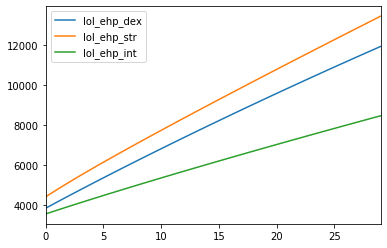

In [12]:
compare(all_cl_df, ['lol_ehp',]).plot()

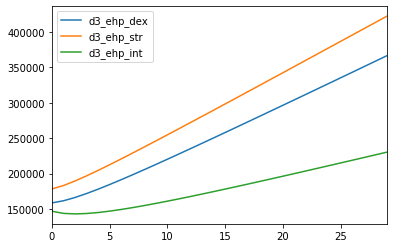

In [13]:
compare(all_cl_df, ['d3_ehp',]).plot()

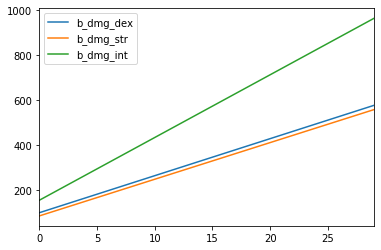

In [14]:
compare(all_cl_df, ['b_dmg',]).plot()

In [15]:
cl_df_l_copy = cl_df_list.copy()

In [16]:
cl_df_l_copy[1]

,lvl,vit,dex,str,int,b_speed,toughness,u_name,speed,ticks_to_turn,...,armor,dodge,d3_res_reduction,d3_res_dmg_taken,dmg_multi_lol,lol_dmg_taken,lol_dmg_redu_dodge,d3_dmg_redu_dodge,lol_ehp,d3_ehp
0,1,14,8,15,4,8,9,str_cl,9.160,109.17,...,91,7.3480,94.791667,4.165625,0.523560,41.874346,38.797419,3.859535,4433.460814,178445.054400
1,2,16,9,18,5,9,12,str_cl,9.305,107.47,...,116,7.5915,92.063492,7.739683,0.462963,45.148148,41.720726,7.152125,4799.187972,183275.775274
2,3,18,10,21,6,10,15,str_cl,9.450,105.82,...,141,7.8350,90.384615,11.132692,0.414938,48.041494,44.277443,10.260446,5151.293655,189689.375365
3,4,20,11,24,7,11,18,str_cl,9.595,104.22,...,166,8.0785,89.247312,14.494624,0.375940,50.676692,46.582775,13.323675,5493.474325,196919.697948
4,5,22,12,27,8,12,21,str_cl,9.740,102.67,...,191,8.3220,88.425926,17.892361,0.343643,53.123711,48.702756,16.403359,5828.156185,204626.228922
5,6,24,13,30,9,13,24,str_cl,9.885,101.16,...,216,8.5655,87.804878,21.368293,0.316456,55.449367,50.699852,19.537992,6156.997650,212634.558626
6,7,26,14,33,10,14,27,str_cl,10.030,99.70,...,241,8.8090,87.318841,24.940036,0.293255,57.674487,52.593941,22.743068,6481.170798,220846.107685
7,8,28,15,36,11,15,30,str_cl,10.175,98.28,...,266,9.0525,86.928105,28.630065,0.273224,59.841530,54.424376,26.038329,6801.527467,229200.955304
8,9,30,16,39,12,16,33,str_cl,10.320,96.90,...,291,9.2960,86.607143,32.446875,0.255754,61.961637,56.201683,29.430613,7118.701633,237660.580971
9,10,32,17,42,13,17,36,str_cl,10.465,95.56,...,316,9.5395,86.338798,36.403005,0.240385,64.055288,57.944734,32.930341,7433.174873,246199.093852
